#                                                       Networkx


In [169]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [10]:
G = nx.Graph()
G.add_edge(1,2, weight = 3)
G.add_edge(2,3)
G.add_edge(2,4)

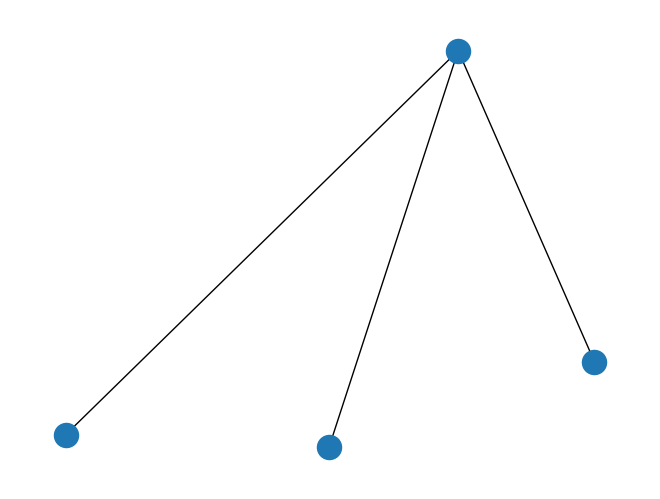

In [21]:
nx.draw(G, pos=nx.random_layout(G))

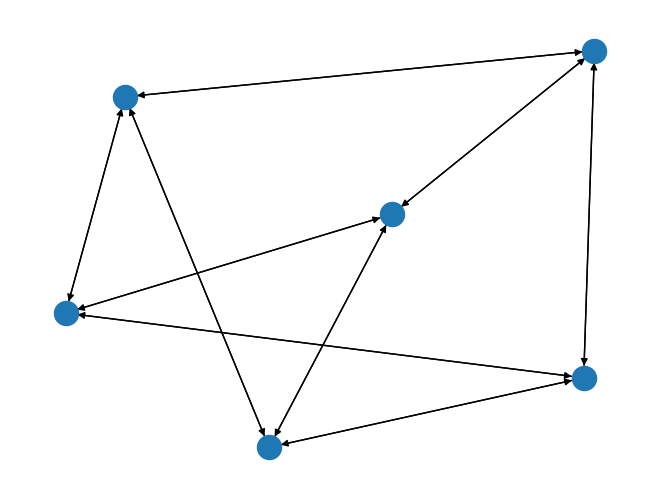

In [138]:
A = nx.planted_partition_graph(2, 3, 0, 1, directed=True)
nx.draw(A, pos=nx.spring_layout(A))

In [146]:
nx.bipartite.sets(A)

({0, 1, 2}, {3, 4, 5})

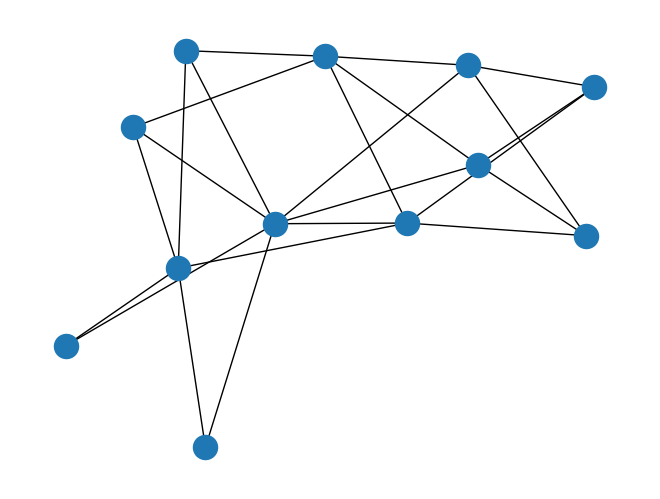

In [218]:
def random_tripartite_graph(n1 : int, n2 : int, n3 : int, p : float):
    'Return a (n1, n2, n3) tripartite graph with edge probability p'
    A1 = nx.bipartite.random_graph(n1, n2, p)
    A2 = list(range(n1+n2, n1+n2+n3))

    G = nx.Graph()
    G.add_nodes_from(A1.nodes())
    G.add_edges_from(A1.edges())
    G.add_nodes_from(A2)
    
    for _, s in A1.edges():
        for v in A2:
            a = random.random()
            if a < p : G.add_edge(s, v)
    
    return G

In [325]:
def tripartite_layout_color(G, partition : list):
    "Return an adequate pos for tripartite, so len(partition) = 3"
    offset = [0, sum(partition[:1]), sum(partition[:2]), sum(partition)]
    classes = ['P', 'S', 'C']
    pos = dict()
    C = ['red', 'blue', 'green']
    color = list()
    for i in range(3):
        for nodes in [nodes for nodes in G.nodes() if nodes < offset[i+1] and nodes >= offset[i]]:
            G.nodes[nodes]['layer'] = classes[i]
            pos[nodes] = (nodes - offset[i], 2-i)
            color.append(C[i])

    return pos, color

In [344]:
def charge_attribute(G, C):
    'attribute a charge to each client node'
    i = 0
    for nodes in G.nodes():
        if G.nodes[nodes]['layer'] == 'C':
            G.nodes[nodes]['charge'] = C[i]
            i += 1
        else :
            G.nodes[nodes]['charge'] = 0

{0: Text(0, 2.12, '0'),
 1: Text(1, 2.12, '0'),
 2: Text(2, 2.12, '0'),
 3: Text(0, 1.12, '0'),
 4: Text(1, 1.12, '0'),
 5: Text(2, 1.12, '0'),
 6: Text(3, 1.12, '0'),
 7: Text(4, 1.12, '0'),
 8: Text(5, 1.12, '0'),
 9: Text(6, 1.12, '0'),
 10: Text(7, 1.12, '0'),
 11: Text(0, 0.12, '13.0'),
 12: Text(1, 0.12, '40.0'),
 13: Text(2, 0.12, '99.3'),
 14: Text(3, 0.12, '34'),
 15: Text(4, 0.12, '190')}

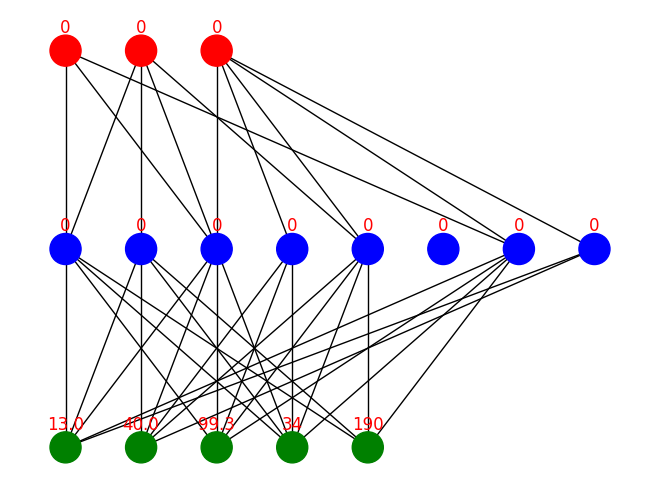

In [441]:
n1, n2, n3 = 3, 8, 5
p = 0.5
C = [13., 40., 99.3, 34, 190]
G = random_tripartite_graph(n1, n2, n3, p)
partition = [n1, n2, n3]
pos, node_color = tripartite_layout_color(G, partition)
charge_attribute(G, C)
pos_label = {node : (x, y + 0.12) for node, (x, y) in pos.items()}
attributes = {nodes : G.nodes[nodes]['charge'] for nodes in G.nodes()}
nx.draw(G, pos=pos, node_color=node_color, node_size=500)
nx.draw_networkx_labels(G, pos=pos_label, labels=attributes, font_color='red')

In [442]:
print([(node, list(G.adj[node].keys())) for node in G.nodes if G.nodes[node]['layer'] == 'C'])

[(11, [3, 9, 4, 5, 10]), (12, [5, 4, 7, 6, 10]), (13, [3, 5, 7, 6, 9]), (14, [3, 9, 4, 5, 6, 7]), (15, [3, 4, 7, 9])]


# Evolution of the graph from an initial state

In [443]:
def evolution(G, i):
    """Works on tripartite graph with initial charges for clients (third group)
    distribution of charge equally along neighboring switches, and therefore producers"""
    Step = ['C', 'S', 'P']
    C_adj = [(node, list(G.adj[node].keys())) for node in G.nodes if G.nodes[node]['layer'] == Step[i]]
    for node, neighbors in C_adj:
        neighbors_plus = [a for a in neighbors if G.nodes[a]['layer'] == Step[i+1]]
        m = len(neighbors_plus)
        for a in neighbors_plus :
            G.nodes[a]['charge'] += G.nodes[node]['charge']/m
            G.nodes[a]['charge'] = round(G.nodes[a]['charge'], 2)
        G.nodes[node]['charge'] = 0

    

{0: Text(0, 2.12, '0'),
 1: Text(1, 2.12, '0'),
 2: Text(2, 2.12, '0'),
 3: Text(0, 1.12, '75.63'),
 4: Text(1, 1.12, '63.77'),
 5: Text(2, 1.12, '36.13'),
 6: Text(3, 1.12, '33.53'),
 7: Text(4, 1.12, '81.03'),
 8: Text(5, 1.12, '0'),
 9: Text(6, 1.12, '75.63'),
 10: Text(7, 1.12, '10.6'),
 11: Text(0, 0.12, '0'),
 12: Text(1, 0.12, '0'),
 13: Text(2, 0.12, '0'),
 14: Text(3, 0.12, '0'),
 15: Text(4, 0.12, '0')}

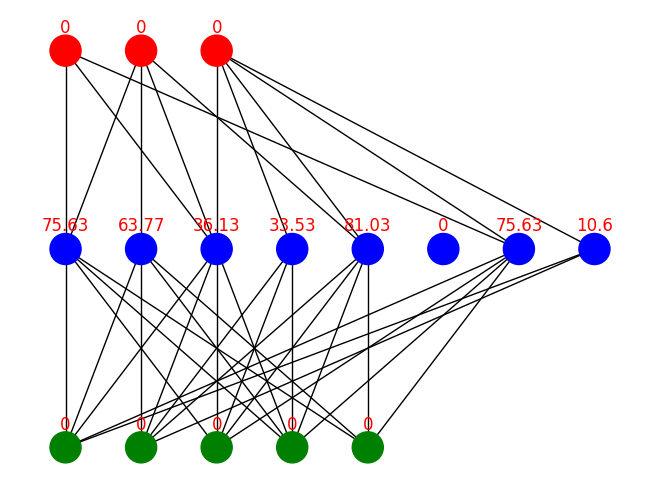

In [444]:
evolution(G,0)
pos_label = {node : (x, y + 0.12) for node, (x, y) in pos.items()}
attributes = {nodes : G.nodes[nodes]['charge'] for nodes in G.nodes()}
nx.draw(G, pos=pos, node_color=node_color, node_size=500)
nx.draw_networkx_labels(G, pos=pos_label, labels=attributes, font_color='red')

In [455]:
print((sum(C)-sum([G.nodes[a]['charge'] for a in G.nodes if G.nodes[a]['layer'] == 'S']))<1e-1)

False


{0: Text(0, 2.12, '87.66'),
 1: Text(1, 2.12, '154.13'),
 2: Text(2, 2.12, '134.51'),
 3: Text(0, 1.12, '0'),
 4: Text(1, 1.12, '0'),
 5: Text(2, 1.12, '0'),
 6: Text(3, 1.12, '0'),
 7: Text(4, 1.12, '0'),
 8: Text(5, 1.12, '0'),
 9: Text(6, 1.12, '0'),
 10: Text(7, 1.12, '0'),
 11: Text(0, 0.12, '0'),
 12: Text(1, 0.12, '0'),
 13: Text(2, 0.12, '0'),
 14: Text(3, 0.12, '0'),
 15: Text(4, 0.12, '0')}

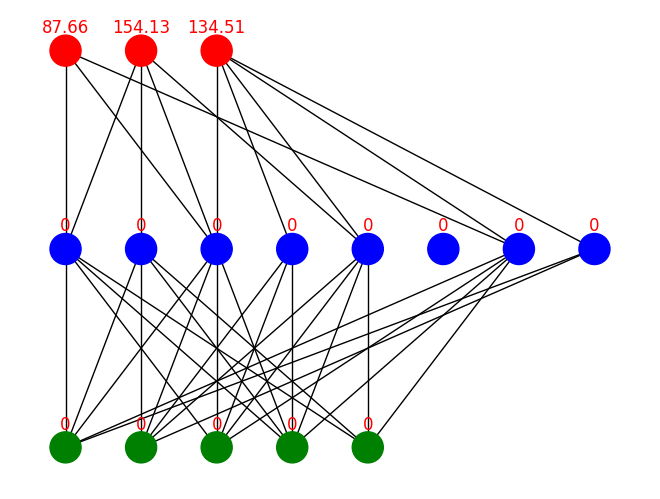

In [456]:
evolution(G,1)
attributes = {nodes : G.nodes[nodes]['charge'] for nodes in G.nodes()}
nx.draw(G, pos=pos, node_color=node_color, node_size=500)
nx.draw_networkx_labels(G, pos=pos_label, labels=attributes, font_color='red')

In [458]:
print(abs(sum(C)-sum([G.nodes[a]['charge'] for a in G.nodes if G.nodes[a]['layer'] == 'P']))<1e-1)

True


# Now we need a metric, a distance, a score !

Our metric is the standard deviation of each the producers charges.
We first need to define our variables.
We'll work with $x_s$ which equals 1 if switch s is on, 0 otherwise.

In [463]:
def switches_vars(G):
    switch_index = [node for node in G.nodes if G.nodes[node]['layer'] == 'S']
    Xs = [int(node in G.nodes) for node in switch_index]
    return switch_index, Xs

2

In [464]:
def optimization_step(Xs):
    a = random.randint(0, len(Xs)-1)
    Xs[a] = 1 - Xs[a]
    return Xs
